# Udacity Data Analysis Project - Jeffrey Flynn

## Investigate the TMDB Movie Dataset

This dataset presents information for movies based on common metrics such as budeget, revenue, genre, popularity, etc...
I will investigate this dataset, clean the data, and answer 4 questions based off the information.

In [60]:
# Import statements for all of the packages that I plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [61]:
# Load the data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb_movies_2.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [62]:
#see the column info and null values in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [63]:
#Show descriptive statistics for the data set.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [64]:
#filter the zero budget data
df_budget_zero = df.query('budget == 0')
# choice the first three randomly
df_budget_zero.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04


In [65]:
#count zero values in budget data using groupby
df_budget_0count =  df.groupby('budget').count()['id']
df_budget_0count.head(2)

budget
0    5696
1       4
Name: id, dtype: int64

In [66]:
#count zero values in revenue data using groupby
df_revenue_0count =  df.groupby('revenue').count()['id']
df_revenue_0count.head(3)

revenue
0    6016
2       2
3       3
Name: id, dtype: int64

In [67]:
#count zero values in runtime data using groupby
df_runtime_0count =  df.groupby('runtime').count()['id']
df_runtime_0count.head(3)

runtime
0    31
2     5
3    11
Name: id, dtype: int64

## Clean the TMDB Movie dataset.

In this section I will be cleaning the data and preparing it to investigate the questions I am asking.

In [68]:
#Drop the duplicates
df.drop_duplicates(inplace=True)

In [69]:
#replace zero values with null values in the budget and revenue column.
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
# see if nulls are added in budget and revenue columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  5169 non-null float64
revenue                 4849 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj             

In [70]:
# see if nulls are dropped.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [71]:
#replace zero values with null values in the budget, runtime and revenue columns.
df['budget'] = df['budget'].replace(0, np.NaN)
df['runtime'] = df['runtime'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)
# see if nulls are added in budget and revenue columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  5169 non-null float64
revenue                 4849 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10834 non-null float64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj           

In [72]:
# directly filter the runtime data for nonzero values and delete them.
df.query('runtime != 0', inplace=True)
#check for good results.
df.query('runtime == 0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [73]:
#Cleaning result summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  5169 non-null float64
revenue                 4849 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10834 non-null float64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj           

In [74]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,5.169000e+03,4.849000e+03,10834.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,3.073958e+07,8.923886e+07,102.363855,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.890441e+07,1.620801e+08,30.948225,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,6.000000e+06,7.732325e+06,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,1.700000e+07,3.185308e+07,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,4.000000e+07,9.996575e+07,112.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Exploratory Data Analysis

### This section will explore the questions I am proposing to answer.

    1.	Does a movie’s budget correlate to movie runtime?
    2.	Which movie genres are the most expensive to create?
    3.	Is there a correlation between a movie’s genre and popularity score on TMDB?
    4.	Which production comp[anies have the highest revenue?

I will be going through the Data Analysis process for each question, on at a time.

## 1. Does a movie’s budget correlate to movie runtime?

My initial suspicion is that movie budget does **NOT** directly correlate to a movie's runtime. A movie's runtime isn't necessarily related to cost due to factors such as creative editing decisions. For example, cost intesive CGI effects in super hero movies are very expensive. Let's let the data tell us the truth!

In [75]:
# Compute the Mean for budget vs. runtime
p_mean = df.groupby('budget').mean()['runtime']
p_mean.tail()

budget
270000000.0    154.0
280000000.0    141.0
300000000.0    169.0
380000000.0    136.0
425000000.0    100.0
Name: runtime, dtype: float64

In [76]:
# build the index location for x-axis
index_mean = p_mean.index

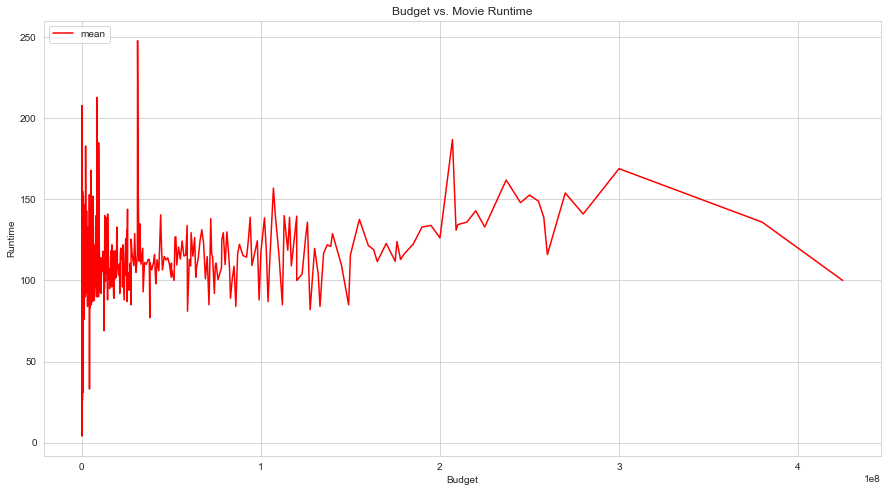

In [77]:
#set style
sns.set_style('whitegrid')
#set x, y axis data
#x1, y1 for mean data; x2, y2 for median data
x1, y1 = index_mean, p_mean
#set size
plt.figure(figsize=(15, 8))
#plot line chart for mean and median
plt.plot(x1, y1, color = 'r', label = 'mean')
#set title and labels
plt.title('Budget vs. Movie Runtime')
plt.xlabel('Budget')
plt.ylabel('Runtime');
#set legend
plt.legend(loc='upper left')
plt.show()

The graph in this case doesn't prove very useful, but the output of the calculation of the mean between movie budget and movie runtime shows that there is not a correlation between movie budget and movie runtime as I predicted. For example, the movies with a **100 minute runtime have an average cost of 425,000,000**, while the movies with an average runtime of **169 minutes cost 300,000,000**! This proves that there is no direct correlation between movie budget and movie runtime.

## 2. Are movies getting more expensive to make over time?

I predict that movies are getting more expesive to make over time. I will demonstrate my prediction by averaging each movie's budget by year and then plotting that on a graph. I will use inflation adjusted budget information so the results are the most relevant in today's dollars.

In [86]:
# Compute the Mean for expense by year
exp_mean = df.groupby('release_year').mean()['budget_adj']
exp_mean.tail()

release_year
2011    1.618922e+07
2012    1.336439e+07
2013    1.311873e+07
2014    1.042674e+07
2015    1.111100e+07
Name: budget_adj, dtype: float64

In [87]:
# build the index location for x-axis
index_mean = exp_mean.index

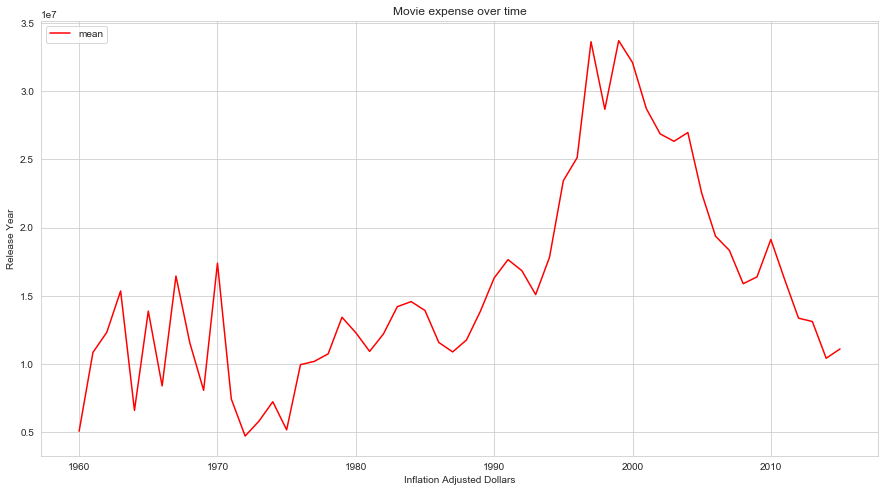

In [88]:
#set style
sns.set_style('whitegrid')
#set x, y axis data
#x1, y1 for mean data; x2, y2 for median data
x1, y1 = index_mean, exp_mean
#set size
plt.figure(figsize=(15, 8))
#plot line chart for mean and median
plt.plot(x1, y1, color = 'r', label = 'mean')
#set title and labels
plt.title('Movie expense over time')
plt.xlabel('Inflation Adjusted Dollars')
plt.ylabel('Release Year');
#set legend
plt.legend(loc='upper left')
plt.show()

Again, my prediction wasn't 100% correct! I am surprised by how non-linear the graph plot is! I fully expected to see a pretty straight line start at the bottom left of the graph and move towards the top right. 

## 3. Are more movies being made over time?

I think that movies have become more popular as the quality of sets, costumes and special effects has improved. I also think that the prevalence of more movie distribution channels (large format theatres, dvds, blu-ray dics, online streaming) have encouraged more investment in movies.

In [89]:
movie_count = df.groupby('release_year').count()['id']
movie_count.head()

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64

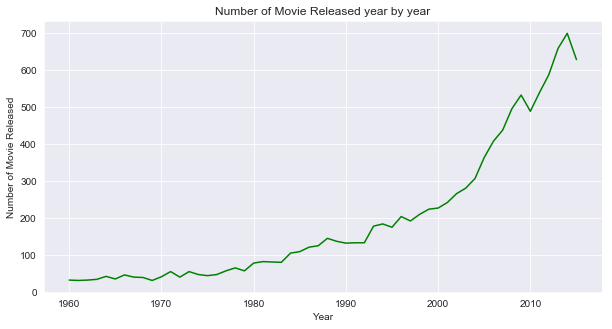

In [90]:
#set style
sns.set_style('darkgrid')
#set x, y axis data
# x is movie release year
x = movie_count.index
# y is number of movie released
y = movie_count
#set size
plt.figure(figsize=(10, 5))
#plot line chart 
plt.plot(x, y, color = 'g', label = 'mean')
#set title and labels
plt.title('Number of Movie Released year by year')
plt.xlabel('Year')
plt.ylabel('Number of Movie Released');

The graph clearly shows an increase in movie production over time! Although the dataset didn't include movie distribution channels, I can clearly see an uptick in movies produced by decade. I know that in the 1980's where we really start to see movie production jump, the advent of the VHS player and home movie distribution became very affordable and popular. Home movie distribution has become more advanced, cheaper, and more widely available to a global market over time. 

From this data and my experiance with movie streaming applications, I know that I watch more movies per week than I did in the early 2000's and 1990's. Back then I would have had to go to a movie theatre to watch a movie. It makes perfect sense that more movies are being made. 

You can see that in roughly 2008 movie production took a sharp but small drop. This correlates perfectly to the global recession, which would have hindered movie production. The you see a sharp unptick in movies being made which times correctly to the end of the recession.

## 4. Is there a correlation between a film's popularity and vote count?

I predict that there is a direct correlation between a film's popularity and vote count.

In [79]:
# Compute the Mean for popularity
pop_mean = df.groupby('popularity').mean()['vote_count']
pop_mean.tail()

popularity
13.112507    2480.0
14.311205    5612.0
24.949134    6498.0
28.419936    6185.0
32.985763    5562.0
Name: vote_count, dtype: float64

In [80]:
# build the index location for x-axis
index_mean = pop_mean.index

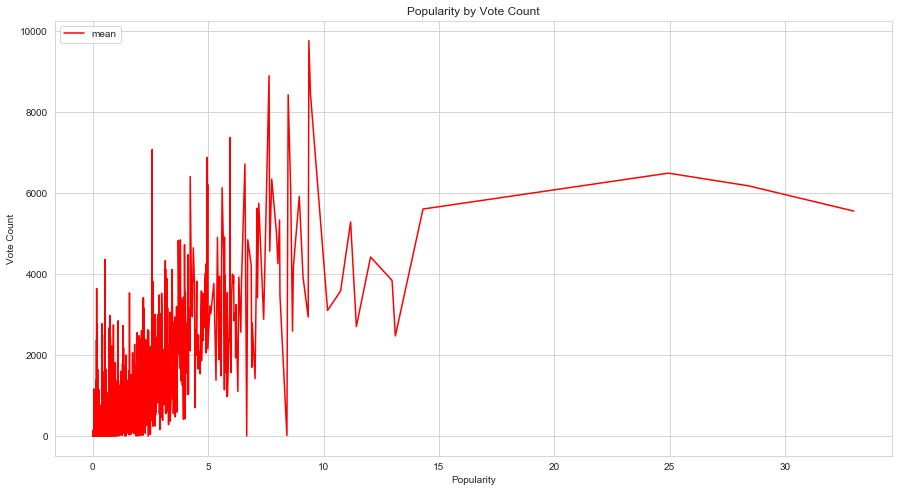

In [81]:
#set style
sns.set_style('whitegrid')
#set x, y axis data
#x1, y1 for mean data; x2, y2 for median data
x1, y1 = index_mean, pop_mean
#set size
plt.figure(figsize=(15, 8))
#plot line chart for mean and median
plt.plot(x1, y1, color = 'r', label = 'mean')
#set title and labels
plt.title('Popularity by Vote Count')
plt.xlabel('Popularity')
plt.ylabel('Vote Count');
#set legend
plt.legend(loc='upper left')
plt.show()

After analysing the results, I find that there is **NO** direct correlation between popularity and vote count. This is demonstrated by movies that recieved a popularity score of 14.31 with 5612 votes. This is juxtaposed by movies that had a popularity score of 32.98 yet had slightly fewer votes (5562 votes). From these results it's obvious to see that it's not only the number of votes that count; it's the value contained inside each vote that really counts! 

# Conclusions:

## 1. Does a movie’s budget correlate to movie runtime?

### Prediction:
My initial suspicion is that movie budget does **NOT** directly correlate to a movie's runtime. A movie's runtime isn't necessarily related to cost due to factors such as creative editing decisions. For example, cost intesive CGI effects in super hero movies are very expensive. Let's let the data tell us the truth!

### Conclusion:
The graph in this case doesn't prove very useful, but the output of the calculation of the mean between movie budget and movie runtime shows that there is not a correlation between movie budget and movie runtime as I predicted. For example, the movies with a **100 minute runtime have an average cost of 425,000,000**, while the movies with an average runtime of **169 minutes cost 300,000,000**! This proves that there is no direct correlation between movie budget and movie runtime.

## 2. Are movies getting more expensive to make over time?

I predict that movies are getting more expesive to make over time. I will demonstrate my prediction by averaging each movie's budget by year and then plotting that on a graph. I will use inflation adjusted budget information so the results are the most relevant in today's dollars.

### Prediction:
I predict that movies are getting more expesive to make over time. I will demonstrate my prediction by averaging each movie's budget by year and then plotting that on a graph. I will use inflation adjusted budget information so the results are the most relevant in today's dollars.

### Conclusion:
Again, my prediction wasn't 100% correct! I am surprised by how non-linear the graph plot is! I fully expected to see a pretty straight line start at the bottom left of the graph and move towards the top right. 

## 3. Are more movies being made over time?

### Prediction:
I think that movies have become more popular as the quality of sets, costumes and special effects has improved. I also think that the prevalence of more movie distribution channels (large format theatres, dvds, blu-ray dics, online streaming) have encouraged more investment in movies.

### Conclusion:
The graph clearly shows an increase in movie production over time! Although the dataset didn't include movie distribution channels, I can clearly see an uptick in movies produced by decade. I know that in the 1980's where we really start to see movie production jump, the advent of the VHS player and home movie distribution became very affordable and popular. Home movie distribution has become more advanced, cheaper, and more widely available to a global market over time. 

From this data and my experiance with movie streaming applications, I know that I watch more movies per week than I did in the early 2000's and 1990's. Back then I would have had to go to a movie theatre to watch a movie. It makes perfect sense that more movies are being made. 

You can see that in roughly 2008 movie production took a sharp but small drop. This correlates perfectly to the global recession, which would have hindered movie production. The you see a sharp unptick in movies being made which times correctly to the end of the recession.

## 4. Is there a correlation between a film's popularity and vote count?

### Prediction:
I predict that there is a direct correlation between a film's popularity and vote count.

### Conclusion:
After analysing the results, I find that there is **NO** direct correlation between popularity and vote count. This is demonstrated by movies that recieved a popularity score of 14.31 with 5612 votes. This is juxtaposed by movies that had a popularity score of 32.98 yet had slightly fewer votes (5562 votes). From these results it's obvious to see that it's not only the number of votes that count; it's the value contained inside each vote that really counts! 

### References, sources of information, and sample code:

1. https://medium.com/python-pandemonium/data-visualization-in-python-line-graph-in-matplotlib-9dfd0016d180
2. https://docs.python.org/3.1/library/csv.html
3. https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#emphasis
4. https://github.com/onpillow/Udacity-DAND-Term1/blob/master/p2/Investigate_a_Dataset.ipynb
5. https://stackoverflow.com/questions/53529568/seaborn-matplotlib-graph-not-axis-not-displaying-correct-values?noredirect=1#comment93930032_53529568
6. https://classroom.udacity.com/nanodegrees/nd000/parts/9d1d2622-a0d2-4247-94c0-8cee5484472d/modules/79391853-a445-418a-9d75-b20f904ab380/lessons/9df2d47c-08c6-4597-b6e6-71409fa1c56f/concepts/68222602190923
7. https://stackoverflow.com/
8. https://google.com
9. https://kaggle.com
10. https://towardsdatascience.com/23-great-pandas-codes-for-data-scientists-cca5ed9d8a38

## **Thank you for taking the time read my work.**

#### Regards,
#### Jeffrey Flynn